# Feature Engineering

In [180]:
#Import relevant packages
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling as pp 
from pandas_profiling import ProfileReport
import plotly.express as px #visualization
from plotly.subplots import make_subplots #visualization
from matplotlib import pyplot as plt #visualization
import seaborn as sns #visualization
import plotly.graph_objects as go #visualization
from colorama import Fore, Back, Style #change strings color 

In [181]:
#Reading our excel file using pandas
df= pd.read_excel('/Users/pree/Desktop/cancer_dataset.xlsx')

In [182]:
#First look of our dataframe
df.head()

Patient Id   Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0         P1  33.0     1.0            2.0          4.0           5.0   
1        P10  17.0     1.0            3.0          1.0           5.0   
2       P100  35.0     1.0            4.0          5.0           6.0   
3      P1000  37.0     1.0            7.0          7.0           7.0   
4       P101  46.0     1.0            6.0          8.0           7.0   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                   4.0           3.0                     2            2.0   
1                   3.0           4.0                     2            2.0   
2                   5.0           5.0                     4            6.0   
3                   7.0           6.0                     7            7.0   
4                   7.0           7.0                     6            7.0   

   ...  Fatigue  Weight Loss  Shortness of Breath  Wheezing  \
0  ...      3.0          4.0                  2.0       2.0   
1  ...      1.0          3.0                  7.0       8.0   
2  ...      8.0          7.0                  9.0       2.0   
3  ...      4.0          2.0                  3.0       1.0   
4  ...      3.0          NaN                  4.0       1.0   

   Swallowing Difficulty  Clubbing of Finger Nails  Frequent Cold  Dry Cough  \
0                    3.0                       1.0            2.0          3   
1                    6.0                       2.0            1.0          7   
2                    1.0                       4.0            6.0          7   
3                    4.0                       5.0            6.0          7   
4                    4.0                       2.0            4.0          2   

   Snoring   Level  
0        4     Low  
1        2  Medium  
2        2    High  
3        5    High  
4        3    High  

[5 rows x 25 columns]

In [183]:
#Analyzing the number of rows and columns
df.shape

(1000, 25)

In [184]:
#Checking the number of observations/ Non Null/ Data types of our variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient Id                1000 non-null   object 
 1   Age                       997 non-null    float64
 2   Gender                    994 non-null    float64
 3   Air Pollution             991 non-null    float64
 4   Alcohol use               988 non-null    float64
 5   Dust Allergy              993 non-null    float64
 6   OccuPational Hazards      994 non-null    float64
 7   Genetic Risk              994 non-null    float64
 8   chronic Lung Disease      1000 non-null   int64  
 9   Balanced Diet             995 non-null    float64
 10  Obesity                   992 non-null    float64
 11  Smoking                   993 non-null    float64
 12  Passive Smoker            996 non-null    float64
 13  Chest Pain                992 non-null    float64
 14  Coughing 

In [185]:
#Getting a picture of the counts/mean/std/min/IQR/max
df.describe()

Age      Gender  Air Pollution  Alcohol use  Dust Allergy  \
count  997.000000  994.000000     991.000000   988.000000    993.000000   
mean    37.185557    1.400402       3.837538     4.577935      5.225579   
std     12.003960    0.490227       2.032276     2.619582      2.767079   
min     14.000000    1.000000       1.000000     1.000000      1.000000   
25%     28.000000    1.000000       2.000000     2.000000      4.000000   
50%     36.000000    1.000000       3.000000     5.000000      6.000000   
75%     45.000000    2.000000       6.000000     7.000000      7.000000   
max     73.000000    2.000000       8.000000     8.000000     66.000000   

       OccuPational Hazards  Genetic Risk  chronic Lung Disease  \
count            994.000000    994.000000           1000.000000   
mean               4.837022      4.583501              4.380000   
std                2.107293      2.125842              1.848518   
min                1.000000      1.000000              1.000000   
25%                3.000000      2.250000              3.000000   
50%                5.000000      5.000000              4.000000   
75%                7.000000      7.000000              6.000000   
max                8.000000      7.000000              7.000000   

       Balanced Diet     Obesity  ...  Coughing of Blood     Fatigue  \
count     995.000000  992.000000  ...         987.000000  995.000000   
mean        5.184925    4.476815  ...           4.867275    4.081407   
std        22.152435    2.127962  ...           2.426947    7.271704   
min         1.000000    1.000000  ...           1.000000    1.000000   
25%         2.000000    3.000000  ...           3.000000    2.000000   
50%         4.000000    4.000000  ...           4.000000    3.000000   
75%         7.000000    7.000000  ...           7.000000    5.000000   
max       700.000000    7.000000  ...           9.000000  222.000000   

       Weight Loss  Shortness of Breath    Wheezing  Swallowing Difficulty  \
count   995.000000           990.000000  994.000000             993.000000   
mean      3.887437             4.240404    3.794769               3.749245   
std       2.287089             2.288756    2.051731               2.271528   
min       1.000000             1.000000    1.000000               1.000000   
25%       2.000000             2.000000    2.000000               2.000000   
50%       3.000000             4.000000    4.000000               4.000000   
75%       6.000000             6.000000    5.000000               5.000000   
max      20.000000             9.000000   11.000000               8.000000   

       Clubbing of Finger Nails  Frequent Cold    Dry Cough      Snoring  
count                996.000000     997.000000  1000.000000  1000.000000  
mean                   3.928715       3.535607     3.853000     2.926000  
std                    2.390504       1.830681     2.039007     1.474686  
min                    1.000000       1.000000     1.000000     1.000000  
25%                    2.000000       2.000000     2.000000     2.000000  
50%                    4.000000       3.000000     4.000000     3.000000  
75%                    5.000000       5.000000     6.000000     4.000000  
max                    9.000000       7.000000     7.000000     7.000000  

[8 rows x 23 columns]

In [259]:
#Running Autoviz to get a complete picture of the raw dataframe. Commenting it out, but have added the result in the form of an image below:

#plt.figure(figsize = (10, 5))
#from autoviz.AutoViz_Class import AutoViz_Class
#AV = AutoViz_Class()
#df_av = AV.AutoViz('/Users/pree/Desktop/cancer_dataset.xlsx') 
#plt.show()

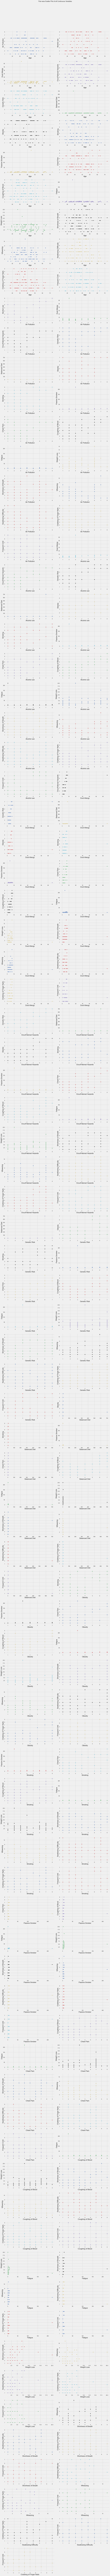

In [187]:
#Running Pandas-profiling report to get even more detailed visulaizayion of the features

#pp.ProfileReport(df)

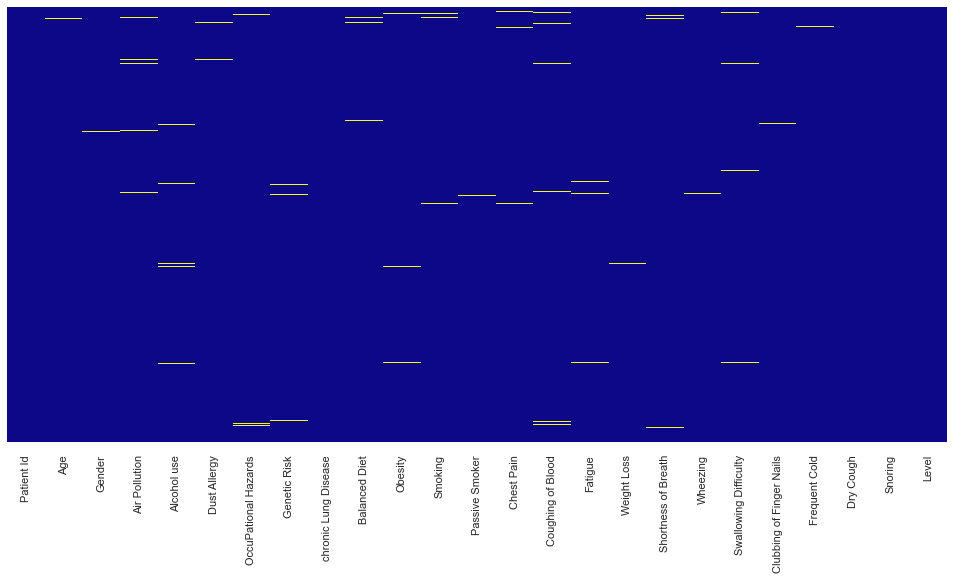

In [189]:
#Visualizing the missing values in the dataframe using a heatmap
plt.figure(figsize=(15,8))
sns.heatmap(yticklabels=False, data=df.isnull(), cbar=False, cmap="plasma")
plt.show() 

In [191]:
#Checking for the exact number of observations with null values
df.isnull().sum()
# for % of null use : the above with * 100 / len(df)

Patient Id                   0
Age                          3
Gender                       6
Air Pollution                9
Alcohol use                 12
Dust Allergy                 7
OccuPational Hazards         6
Genetic Risk                 6
chronic Lung Disease         0
Balanced Diet                5
Obesity                      8
Smoking                      7
Passive Smoker               4
Chest Pain                   8
Coughing of Blood           13
Fatigue                      5
Weight Loss                  5
Shortness of Breath         10
Wheezing                     6
Swallowing Difficulty        7
Clubbing of Finger Nails     4
Frequent Cold                3
Dry Cough                    0
Snoring                      0
Level                        0
dtype: int64

# Cleaning our dataset

In [192]:
#As noticed, we will convert all our columns to lowercase
df.columns= df.columns.str.lower()
df.columns

Index(['patient id', 'age', 'gender', 'air pollution', 'alcohol use',
       'dust allergy', 'occupational hazards', 'genetic risk',
       'chronic lung disease', 'balanced diet', 'obesity', 'smoking',
       'passive smoker', 'chest pain', 'coughing of blood', 'fatigue',
       'weight loss', 'shortness of breath', 'wheezing',
       'swallowing difficulty', 'clubbing of finger nails', 'frequent cold',
       'dry cough', 'snoring', 'level'],
      dtype='object')

In [193]:
#We will then replace all the empty spaces between the variable names with an underscore
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['patient_id', 'age', 'gender', 'air_pollution', 'alcohol_use',
       'dust_allergy', 'occupational_hazards', 'genetic_risk',
       'chronic_lung_disease', 'balanced_diet', 'obesity', 'smoking',
       'passive_smoker', 'chest_pain', 'coughing_of_blood', 'fatigue',
       'weight_loss', 'shortness_of_breath', 'wheezing',
       'swallowing_difficulty', 'clubbing_of_finger_nails', 'frequent_cold',
       'dry_cough', 'snoring', 'level'],
      dtype='object')

In [194]:
df.head()

patient_id   age  gender  air_pollution  alcohol_use  dust_allergy  \
0         P1  33.0     1.0            2.0          4.0           5.0   
1        P10  17.0     1.0            3.0          1.0           5.0   
2       P100  35.0     1.0            4.0          5.0           6.0   
3      P1000  37.0     1.0            7.0          7.0           7.0   
4       P101  46.0     1.0            6.0          8.0           7.0   

   occupational_hazards  genetic_risk  chronic_lung_disease  balanced_diet  \
0                   4.0           3.0                     2            2.0   
1                   3.0           4.0                     2            2.0   
2                   5.0           5.0                     4            6.0   
3                   7.0           6.0                     7            7.0   
4                   7.0           7.0                     6            7.0   

   ...  fatigue  weight_loss  shortness_of_breath  wheezing  \
0  ...      3.0          4.0                  2.0       2.0   
1  ...      1.0          3.0                  7.0       8.0   
2  ...      8.0          7.0                  9.0       2.0   
3  ...      4.0          2.0                  3.0       1.0   
4  ...      3.0          NaN                  4.0       1.0   

   swallowing_difficulty  clubbing_of_finger_nails  frequent_cold  dry_cough  \
0                    3.0                       1.0            2.0          3   
1                    6.0                       2.0            1.0          7   
2                    1.0                       4.0            6.0          7   
3                    4.0                       5.0            6.0          7   
4                    4.0                       2.0            4.0          2   

   snoring   level  
0        4     Low  
1        2  Medium  
2        2    High  
3        5    High  
4        3    High  

[5 rows x 25 columns]

In [195]:
df.tail()

patient_id   age  gender  air_pollution  alcohol_use  dust_allergy  \
995       P995  44.0     1.0            6.0          7.0           7.0   
996       P996  37.0     2.0            6.0          8.0           7.0   
997       P997  25.0     2.0            4.0          5.0           6.0   
998       P998  18.0     2.0            6.0          8.0           7.0   
999       P999  47.0     1.0            6.0          5.0           6.0   

     occupational_hazards  genetic_risk  chronic_lung_disease  balanced_diet  \
995                   7.0           7.0                     6            7.0   
996                   7.0           7.0                     6            7.0   
997                   5.0           5.0                     4            6.0   
998                   7.0           7.0                     6            7.0   
999                   5.0           5.0                     4            6.0   

     ...  fatigue  weight_loss  shortness_of_breath  wheezing  \
995  ...      5.0          3.0                  2.0       7.0   
996  ...      9.0          6.0                  5.0       7.0   
997  ...      8.0          7.0                  9.0       2.0   
998  ...      3.0          2.0                  4.0       1.0   
999  ...      8.0          7.0                  9.0       2.0   

     swallowing_difficulty  clubbing_of_finger_nails  frequent_cold  \
995                    8.0                       2.0            4.0   
996                    2.0                       4.0            3.0   
997                    1.0                       4.0            6.0   
998                    4.0                       2.0            4.0   
999                    1.0                       4.0            6.0   

     dry_cough  snoring  level  
995          5        3   High  
996          1        4   High  
997          7        2   High  
998          2        3   High  
999          7        2   High  

[5 rows x 25 columns]

In [196]:
df['age'] = df['age'].astype('Int64')

In [197]:
df.head()

patient_id  age  gender  air_pollution  alcohol_use  dust_allergy  \
0         P1   33     1.0            2.0          4.0           5.0   
1        P10   17     1.0            3.0          1.0           5.0   
2       P100   35     1.0            4.0          5.0           6.0   
3      P1000   37     1.0            7.0          7.0           7.0   
4       P101   46     1.0            6.0          8.0           7.0   

   occupational_hazards  genetic_risk  chronic_lung_disease  balanced_diet  \
0                   4.0           3.0                     2            2.0   
1                   3.0           4.0                     2            2.0   
2                   5.0           5.0                     4            6.0   
3                   7.0           6.0                     7            7.0   
4                   7.0           7.0                     6            7.0   

   ...  fatigue  weight_loss  shortness_of_breath  wheezing  \
0  ...      3.0          4.0                  2.0       2.0   
1  ...      1.0          3.0                  7.0       8.0   
2  ...      8.0          7.0                  9.0       2.0   
3  ...      4.0          2.0                  3.0       1.0   
4  ...      3.0          NaN                  4.0       1.0   

   swallowing_difficulty  clubbing_of_finger_nails  frequent_cold  dry_cough  \
0                    3.0                       1.0            2.0          3   
1                    6.0                       2.0            1.0          7   
2                    1.0                       4.0            6.0          7   
3                    4.0                       5.0            6.0          7   
4                    4.0                       2.0            4.0          2   

   snoring   level  
0        4     Low  
1        2  Medium  
2        2    High  
3        5    High  
4        3    High  

[5 rows x 25 columns]

In [198]:
#Checking for duplicate values
df.duplicated().sum()

0

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   patient_id                1000 non-null   object 
 1   age                       997 non-null    Int64  
 2   gender                    994 non-null    float64
 3   air_pollution             991 non-null    float64
 4   alcohol_use               988 non-null    float64
 5   dust_allergy              993 non-null    float64
 6   occupational_hazards      994 non-null    float64
 7   genetic_risk              994 non-null    float64
 8   chronic_lung_disease      1000 non-null   int64  
 9   balanced_diet             995 non-null    float64
 10  obesity                   992 non-null    float64
 11  smoking                   993 non-null    float64
 12  passive_smoker            996 non-null    float64
 13  chest_pain                992 non-null    float64
 14  coughing_

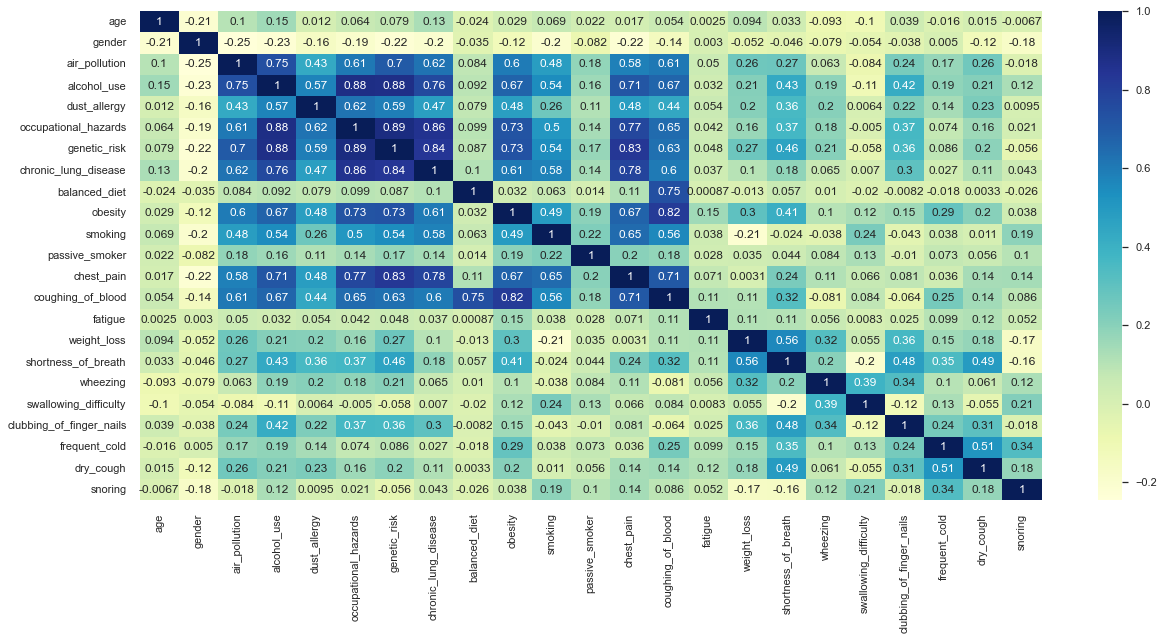

In [200]:
#Checking the correlation between variables using Correlation heatmap

plt.figure(figsize=(18, 9))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show() 

# Getting more info on features that have a high correlation based on our previous correlation heatmap
This will also help us get an understanding of the datatype and the unique vales of each variable. 

In [201]:
#Commenting this variable out as it has all 1000 unique values
#df.patient_id.unique()

# age

In [202]:
df.age.unique() 

<IntegerArray>
[  33,   17,   35,   37,   46,   52,   28,   44,   64,   39,   34,   27,   73,
 <NA>,   36,   14,   24,   53,   62,   29,   65,   19,   42,   32,   25,   45,
   26,   48,   22,   38,   18,   23,   47,   61,   55,   31,   49,   43,   51,
   54,   63]
Length: 41, dtype: Int64

# gender

In [203]:
df.gender.unique()

array([ 1.,  2., nan])

In [204]:
df['gender'] = df['gender'].astype('Int64')

In [228]:
df.gender.unique()

<IntegerArray>
[1, 2, <NA>]
Length: 3, dtype: Int64

# air_pollution

In [205]:
df.air_pollution.unique()

array([ 2.,  3.,  4.,  7.,  6.,  5., nan,  1.,  8.])

In [229]:
df['air_pollution'] = df['air_pollution'].astype('Int64')

In [230]:
df['air_pollution'].unique()

<IntegerArray>
[2, 3, 4, 7, 6, 5, <NA>, 1, 8]
Length: 9, dtype: Int64

# alcohol_use

In [227]:
df.alcohol_use.unique()

array([ 4.,  1.,  5.,  7.,  8., nan,  3.,  6.,  2.])

In [232]:
df['alcohol_use'] = df['alcohol_use'].astype('Int64')

In [233]:
df['alcohol_use'].unique()

<IntegerArray>
[4, 1, 5, 7, 8, <NA>, 3, 6, 2]
Length: 9, dtype: Int64

# dust_allergy

In [208]:
df.dust_allergy.unique()

array([ 5.,  6.,  7.,  4., nan,  2.,  8., 66.,  1.,  3.])

In [234]:
df['dust_allergy'] = df['dust_allergy'].astype('Int64')

In [235]:
df['dust_allergy'].unique()

<IntegerArray>
[5, 6, 7, 4, <NA>, 2, 8, 66, 1, 3]
Length: 10, dtype: Int64

# occupational_hazards

In [209]:
df.occupational_hazards.unique()

array([ 4.,  3.,  5.,  7.,  2.,  6., nan,  8.,  1.])

In [236]:
df['occupational_hazards'] = df['occupational_hazards'].astype('Int64')

In [237]:
df['occupational_hazards'].unique()

<IntegerArray>
[4, 3, 5, 7, 2, 6, <NA>, 8, 1]
Length: 9, dtype: Int64

# genetic_risk

In [210]:
df.genetic_risk.unique()

array([ 3.,  4.,  5.,  6.,  7.,  2., nan,  1.])

In [238]:
df['genetic_risk'] = df['genetic_risk'].astype('Int64')

In [239]:
df['genetic_risk'].unique()

<IntegerArray>
[3, 4, 5, 6, 7, 2, <NA>, 1]
Length: 8, dtype: Int64

# chronic_lung_disease

In [211]:
df.chronic_lung_disease.unique()

array([2, 4, 7, 6, 3, 5, 1])

# balanced_diet

In [212]:
df.balanced_diet.unique()

array([  2.,   6.,   7.,   4.,   5.,   3.,  nan, 700.,   1.])

In [240]:
df['balanced_diet'] = df['balanced_diet'].astype('Int64')

In [241]:
df['balanced_diet'].unique()

<IntegerArray>
[2, 6, 7, 4, 5, 3, <NA>, 700, 1]
Length: 9, dtype: Int64

# obesity

In [213]:
df.obesity.unique()

array([ 4.,  2.,  7.,  3.,  5.,  6., nan,  1.])

In [242]:
df['obesity'] = df['obesity'].astype('Int64')

In [243]:
df['obesity'].unique()

<IntegerArray>
[4, 2, 7, 3, 5, 6, <NA>, 1]
Length: 8, dtype: Int64

# smoking

In [214]:
df.smoking.unique()

array([ 3.,  2.,  7.,  8.,  1.,  6., nan,  5.,  4.])

In [244]:
df['smoking'] = df['smoking'].astype('Int64')

In [245]:
df['smoking'].unique()

<IntegerArray>
[3, 2, 7, 8, 1, 6, <NA>, 5, 4]
Length: 9, dtype: Int64

# chest_pain

In [215]:
df.chest_pain.unique()

array([ 2.,  4.,  7.,  3.,  6., nan,  5.,  9.,  8.,  1.])

In [246]:
df['chest_pain'] = df['chest_pain'].astype('Int64')

In [247]:
df['chest_pain'].unique()

<IntegerArray>
[2, 4, 7, 3, 6, <NA>, 5, 9, 8, 1]
Length: 10, dtype: Int64

# coughing_of_blood

In [216]:
df.coughing_of_blood.unique()

array([ 4.,  3.,  8.,  9.,  1.,  5.,  7., nan,  2.,  6.])

In [248]:
df['coughing_of_blood'] = df['coughing_of_blood'].astype('Int64')

In [249]:
df['coughing_of_blood'].unique()

<IntegerArray>
[4, 3, 8, 9, 1, 5, 7, <NA>, 2, 6]
Length: 10, dtype: Int64

# weight_loss

In [217]:
df.weight_loss.unique()

array([ 4.,  3.,  7.,  2., nan,  6.,  5., 14.,  1.,  8., 20.])

In [250]:
df['weight_loss'] = df['weight_loss'].astype('Int64')

In [251]:
df['weight_loss'].unique()

<IntegerArray>
[4, 3, 7, 2, <NA>, 6, 5, 14, 1, 8, 20]
Length: 11, dtype: Int64

# shortness_of_breath

In [218]:
df.shortness_of_breath.unique()

array([ 2.,  7.,  9.,  3.,  4.,  5., nan,  6.,  1.])

In [252]:
df['shortness_of_breath'] = df['shortness_of_breath'].astype('Int64')

In [253]:
df['shortness_of_breath'].unique()

<IntegerArray>
[2, 7, 9, 3, 4, 5, <NA>, 6, 1]
Length: 9, dtype: Int64

# dry_cough

In [219]:
df.dry_cough.unique()

array([3, 7, 2, 4, 1, 5, 6])

In [254]:
#Checking the dattype of the features we are interested in based on the correlations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   patient_id                1000 non-null   object 
 1   age                       997 non-null    Int64  
 2   gender                    994 non-null    Int64  
 3   air_pollution             991 non-null    Int64  
 4   alcohol_use               988 non-null    Int64  
 5   dust_allergy              993 non-null    Int64  
 6   occupational_hazards      994 non-null    Int64  
 7   genetic_risk              994 non-null    Int64  
 8   chronic_lung_disease      1000 non-null   int64  
 9   balanced_diet             995 non-null    Int64  
 10  obesity                   992 non-null    Int64  
 11  smoking                   993 non-null    Int64  
 12  passive_smoker            996 non-null    float64
 13  chest_pain                992 non-null    Int64  
 14  coughing_

# It appears that most variables have a unique value in the range of (1-8) with a few ouliers and a few missing values. 
This will become visually clear when we run box plots on our features/ variables

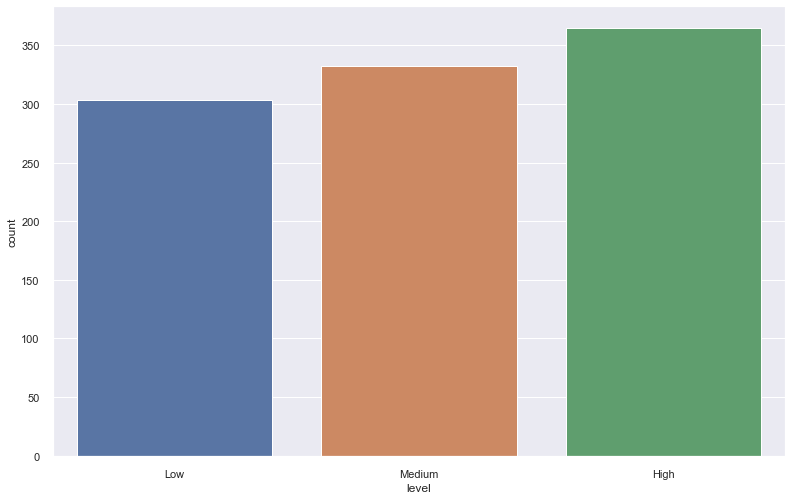

In [220]:
#Lets visualize the 'level' column in terms of value_counts
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(data=df,x='level')
plt.show() 

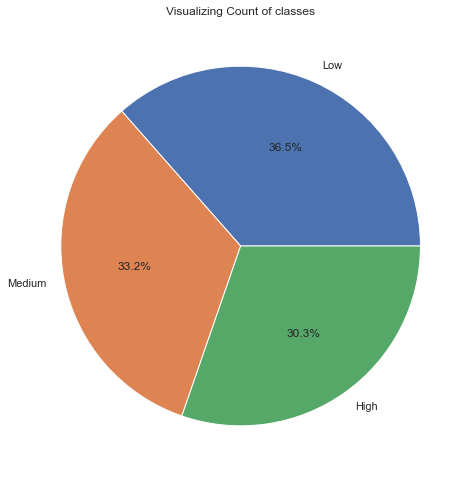

In [221]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.title("Visualizing Count of classes")
plt.pie(np.array(df['level'].value_counts()),labels=['Low','Medium','High'],autopct='%1.1f%%')
plt.show() 

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'air_pollution'}>,
        <AxesSubplot:title={'center':'alcohol_use'}>,
        <AxesSubplot:title={'center':'dust_allergy'}>],
       [<AxesSubplot:title={'center':'occupational_hazards'}>,
        <AxesSubplot:title={'center':'genetic_risk'}>,
        <AxesSubplot:title={'center':'chronic_lung_disease'}>,
        <AxesSubplot:title={'center':'balanced_diet'}>,
        <AxesSubplot:title={'center':'obesity'}>],
       [<AxesSubplot:title={'center':'smoking'}>,
        <AxesSubplot:title={'center':'passive_smoker'}>,
        <AxesSubplot:title={'center':'chest_pain'}>,
        <AxesSubplot:title={'center':'coughing_of_blood'}>,
        <AxesSubplot:title={'center':'fatigue'}>],
       [<AxesSubplot:title={'center':'weight_loss'}>,
        <AxesSubplot:title={'center':'shortness_of_breath'}>,
        <AxesSubplot:title={'center':'wheezing'}>,
        <Axes

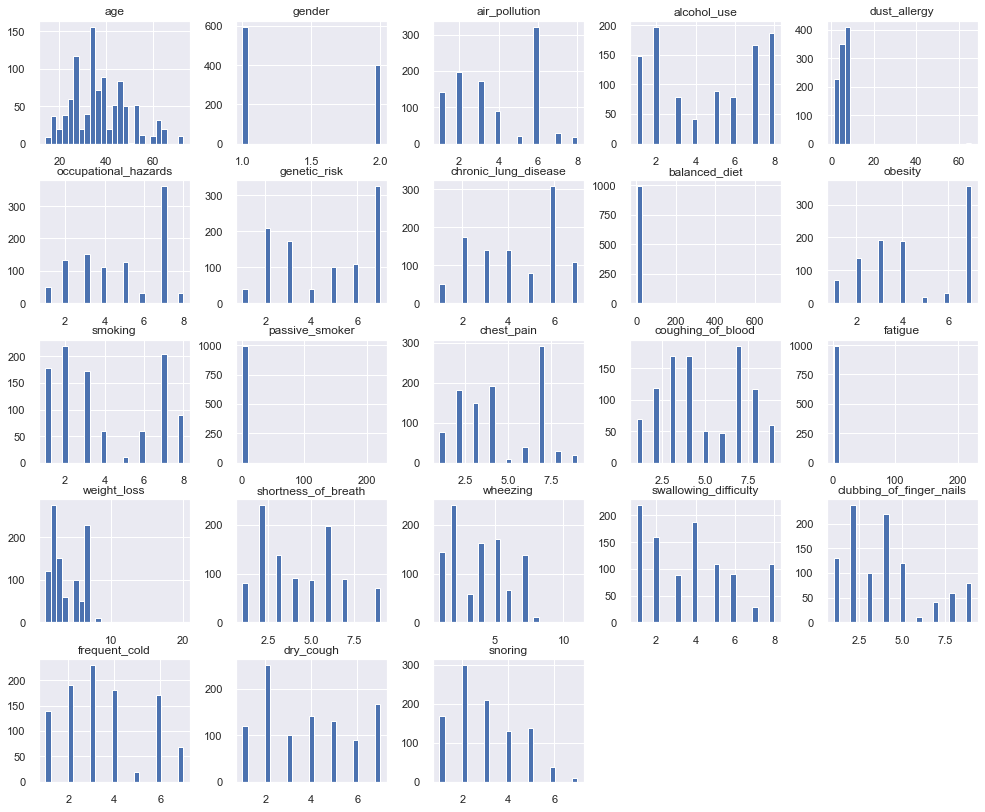

In [222]:
#Lets check the distribution of data for the features
df.hist(bins=25, figsize=(15, 14))

<AxesSubplot:>

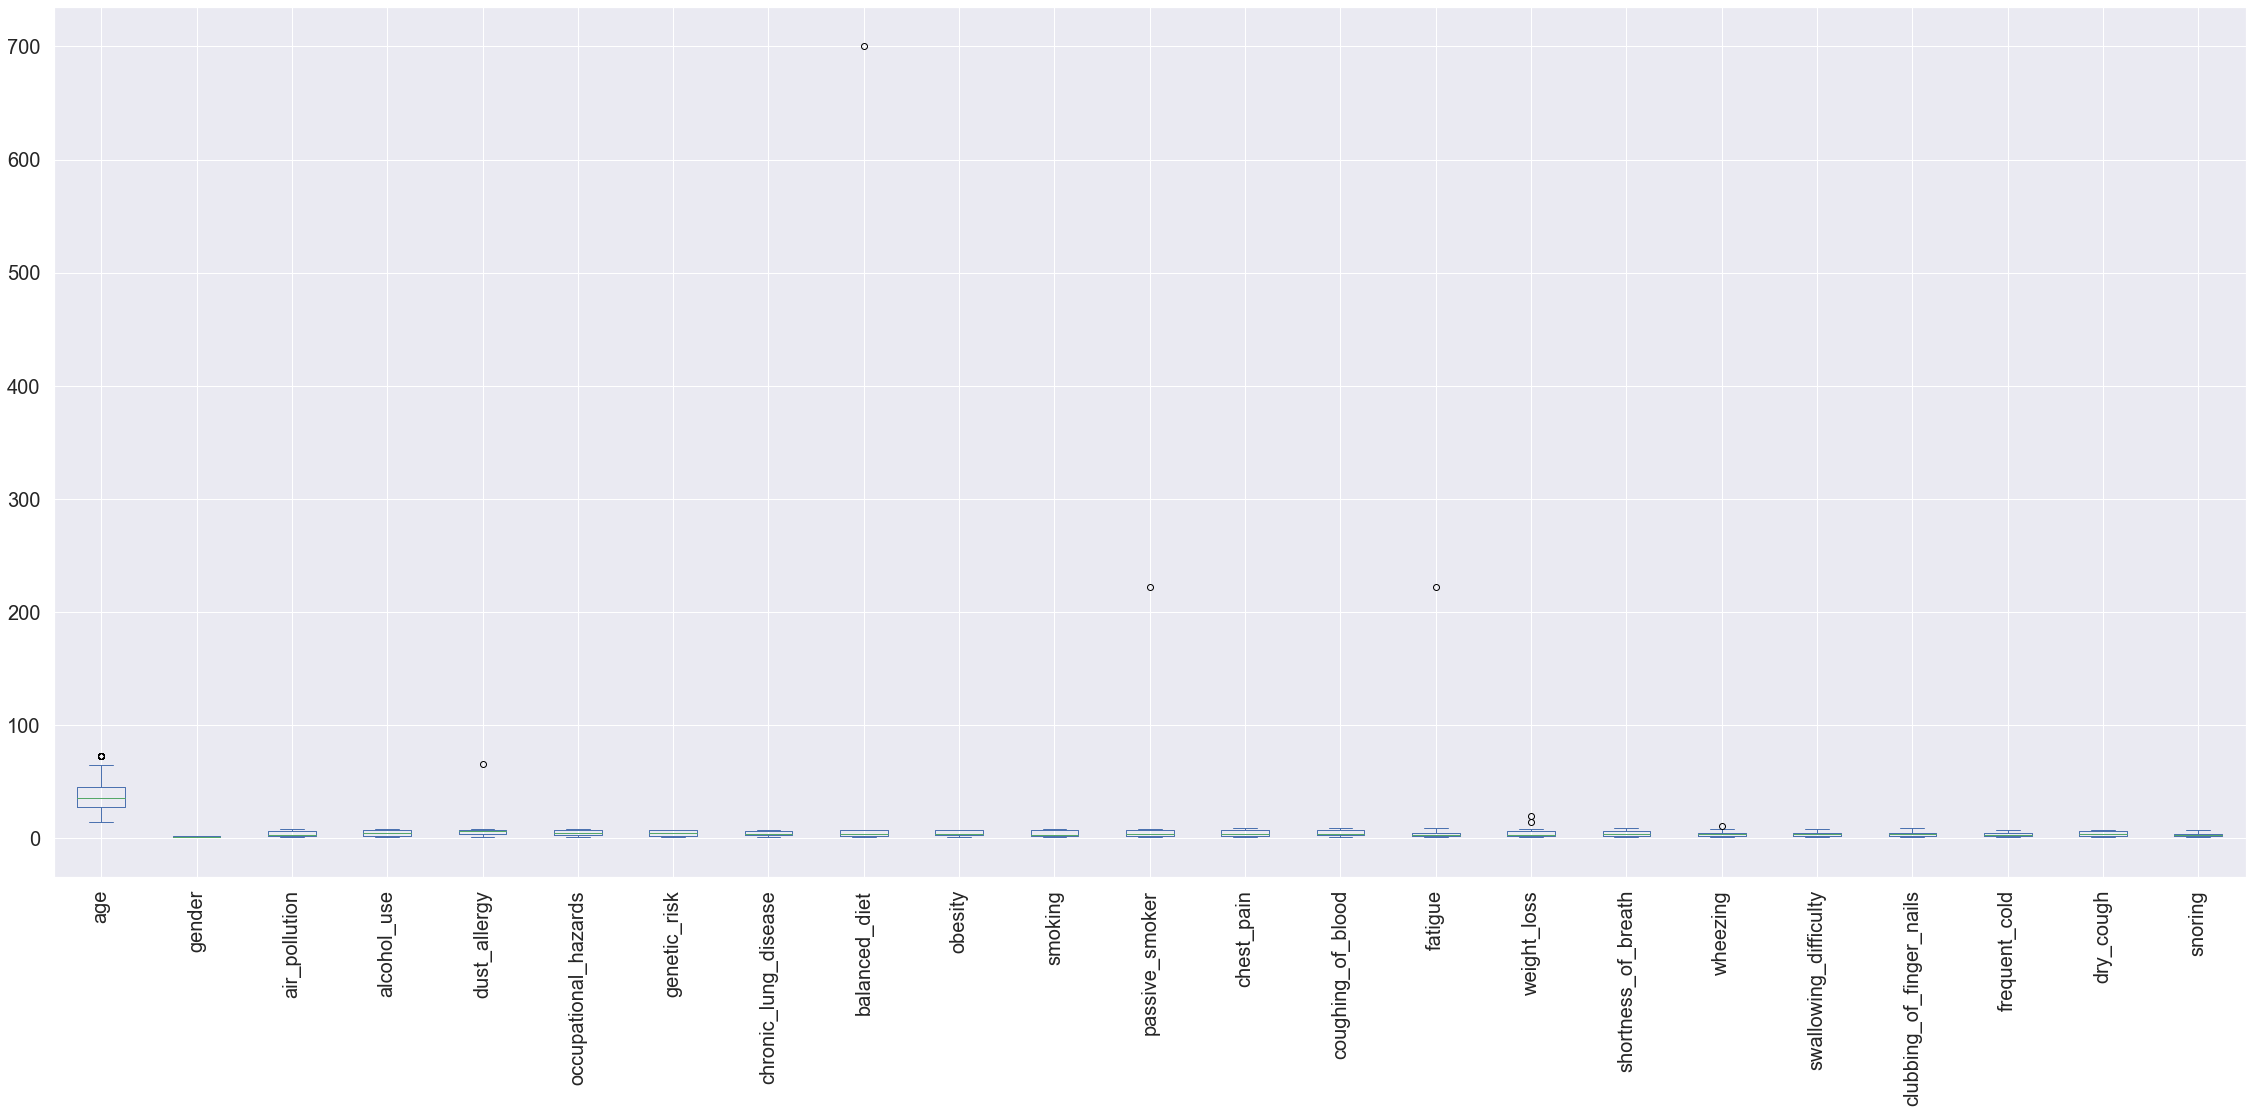

In [256]:
#Checking outliers with box plots
%matplotlib inline
plt.rcParams['figure.figsize'] = (35,16)
df.plot(kind='box',rot=90, fontsize=20)

In [224]:
#Imputing missing values
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
#df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
#df = df.reset_index(drop=True)

In [225]:
#import pandas_profiling as pp 
#from pandas_profiling import ProfileReport
#pp.ProfileReport(df)

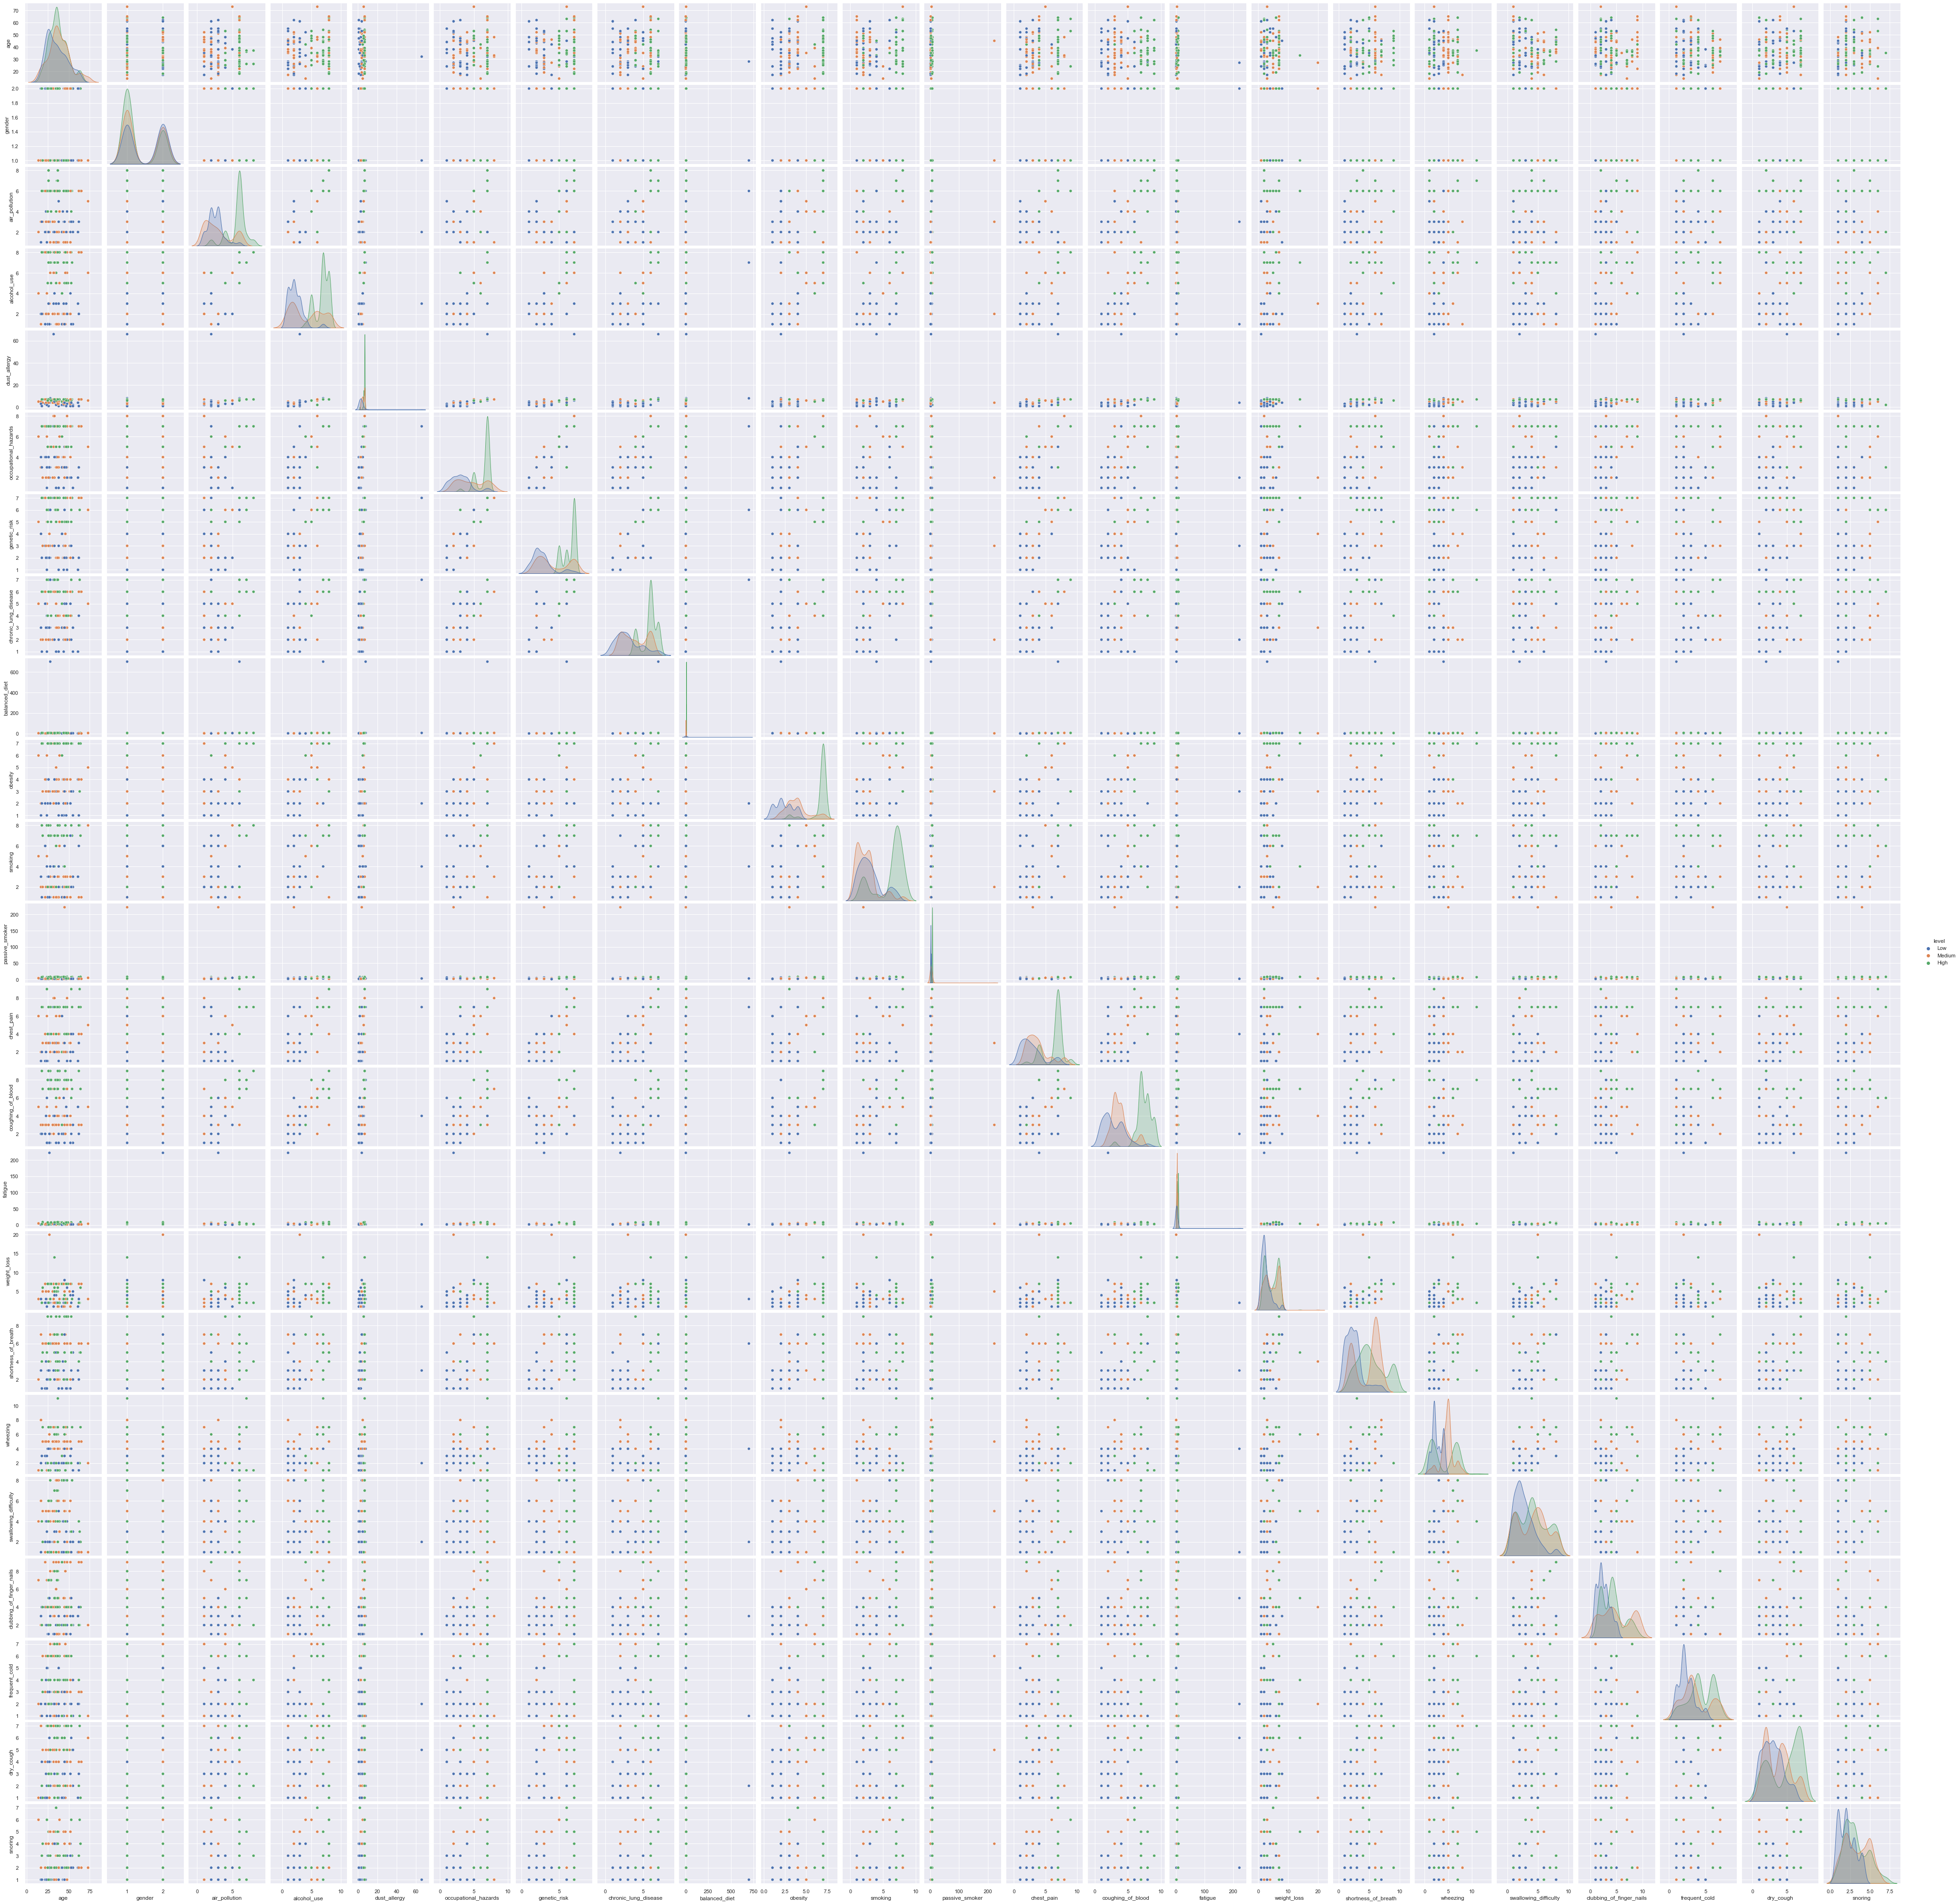

In [257]:
#sns.pairplot(data=df, hue='level') 